# Building a Simple Neural Network

Welcome to the first lab of this course!

In this lab, you'll build and train your first neural network, a single neuron that learns patterns from data to make predictions.

You'll work with the delivery scenario from the lecture videos: You're a bike delivery person with a 7-mile delivery order. Your company promises delivery in under 30 minutes, and one more late delivery could put your job at risk. **Can you make this delivery on time?** Your neural network will learn from historical delivery data to help you decide.

Following the Machine Learning (ML) pipeline from the lecture videos, you will:
- **Prepare** delivery data, the distances and times from past orders.  
- **Build** a simple neural network using PyTorch (just one neuron!).
- **Train** it to find the relationship between distance and delivery time.
- **Predict** whether you can make that 7-mile delivery in time.

#### Import Libraries

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim

from practice_code import helper_utils

torch.manual_seed(42)

In [39]:
print("PyTorch version:", torch.__version__)

PyTorch version: 2.9.0+cpu


The Machine Learning Pipeline in Action

It's time to build your first model! To solve the delivery problem, you'll apply relevant stages of the **Machine Learning Pipeline.**

While the full pipeline provides a comprehensive framework, its strength is its adaptability. For this problem, you'll focus on the esential steps needed to build a predictive model from your data.

**Stage 1 & 2: Data Ingestion and Preparation**

Time to prepare your delivery data for training. In the ML pipeline, this combines two stages: **Data Ingestion** (gathering raw data) and **Data Preparation** (cleaning it up). In more realistic projects, you'd pull delivery logs from a data source and fix errors or missing values. For this lab, that work is already done, but with a twist. This isn't the same data from the lecture videos. You're looking at a different set of deliveries, which means your modeol might find a different pattern and make a different prediction for that 7-mile delivery.

- Define the two essential tensors for your task:
  - The `distances` tensor contains how far you biked for four recent deliveries (in miles).
  - The `times` tensor shows how long each delivery took (in minutes).
  - dtypes=torch.float32 sets your data type to 32-bit floating point values for precise calculations.

In [40]:
# Distances in miles for recent bike deliveries
distances = torch.tensor([[1.0], [2.0], [3.0], [4.0]], dtype=torch.float32)

# Corresponding delivery times in minutes
times = torch.tensor([[6.96], [12.11], [16.77], [22.21]], dtype=torch.float32)

**Stage 3: Model Building**

Now you'll create your model (this is stage 3 of the ML pipeline: Model Building). For bike deliveries, you'll assume a linear relationship between distance and time, a reasonable starting point. Your model will be a single neuron that learns this relationship.

Remember from the lecture videos, a single neuron with one input implements a linear equation:

> <code>Time = W x Distance + B</code>

Your job is to find the best values for the **weight (W)** and **bias (B)** that fit your delivery data.

* Use <code>nn.[Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)(nn.[Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)(1, 1))</code> to create a linear model.

   - `nn.Linear(1, 1)`: The first `1` means it takes one input (distance), and the second `1` means one neuron that is producing one output (predicted time).
   - This single linear layer will automatically manage the weight and bias parameters for you.

In [41]:
# Create a model with one input (distance) and one output (time)
model = nn.Sequential(nn.Linear(1, 1))

**Stage 4: Training**

Time to train your neural network (this is stage 4 of the ML pipeline: **Training**). You need two key tools to help your model learn from the data:

* **Loss Function:** <code>nn.[MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)</code> defines the Mean Squared Error loss function.
    * It measures how wrong your predictions are. If you predict 25 minutes but the actual delivery took 30 minutes, the loss function quantifies that 5-minute error. The model's goal is to minimize this error.
* **Optimizer:** <code>[optim](https://pytorch.org/docs/stable/optim.html).[SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)</code> sets up the Stochastic Gradient Descent optimizer. It adjusts your model's weight and bias parameters based on the errors.
    * `lr=0.01`: This learning rate controls how big each adjustment step is. Too large and you might overshoot the best values; too small and training takes forever.

In [42]:
# Define the loss function and 0ptimizer
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Now it's time for your model to learn. The training loop is where your model cycles through the data repeatedly, gradually discovering the relationship between distance and delivery time.

You'll train for 500 epochs (complete passes through your data). During each epoch, these steps occur:

* <code>optimizer.[zero_grad()](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html)</code>: Clears gradients from the previous round. Without this, PyTorch would accumulate adjustments, which could break the learning process.

* `outputs = model(distances)`: Performs the "forward pass", where the model makes predictions based on the input `distances`.

* `loss = loss_function(outputs, times)`: Calculates how wrong the predicted `outputs` are by comparing them to the actual delivery `times`.

*  <code>loss.[backward()](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html)</code>: The "backward pass" (backpropagation) is performed, which calculates exactly how to adjust the weight and bias to reduce the error.

* <code>optimizer.[step()](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.step.html)</code>: Updates the model's parameters using those calculated adjustments.

* The loss is printed every 50 epochs to allow you to track the model's learning progress as the error decreases.


In [43]:
# Training loop
for epoch in range(500):
    # Reset the optimizer's gradients
    optimizer.zero_grad()
    # Make predictions (forward pass)
    outputs = model(distances)
    # Calculate the loss
    loss = loss_fn(outputs, times)
    # Calculate adjustments (backwards pass)
    loss.backward()
    # Update the model's parameters
    optimizer.step()
    # Print loss every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss.item()}")

Epoch 50: Loss = 0.03944866359233856
Epoch 100: Loss = 0.03581171855330467
Epoch 150: Loss = 0.03311903774738312
Epoch 200: Loss = 0.03112369030714035
Epoch 250: Loss = 0.02964562550187111
Epoch 300: Loss = 0.02855011820793152
Epoch 350: Loss = 0.0277385413646698
Epoch 400: Loss = 0.027137158438563347
Epoch 450: Loss = 0.026691768318414688
Epoch 500: Loss = 0.026361485943198204


**Visualizing the training Results**

Let's see what your model learned. By plotting the model's predictions as a line against your actual delivery data points, you can check if it found a good pattern.

The helper function `plot_results`, will show you:L
   - Your original data points (actual deliveries)
   - The line your model learned (its predictions)
   - How well they match

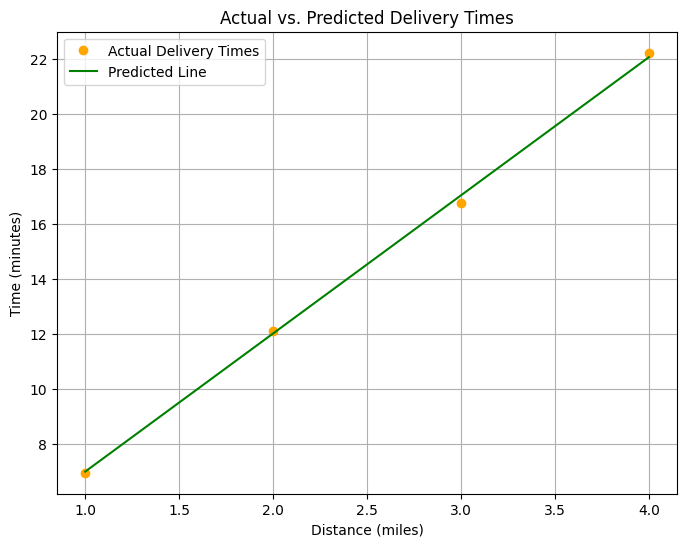

In [44]:
helper_utils.plot_results(model, distances, times)

**Make Your Prediction**

Your model is trained. Now for the moment of truth. **Can you make that 7-mile delivery in under 30 mins?**

While a full evaluation would test the model on many unseen data points, here you'll jump straight to its purpose: making a **data-driven prediction** for a specific delivery.

  - First, you'll set the `distance_to_predict` variable.
     - It is initially set to `7.0` to solve the original problem.
     - After running the code, you can easily come back and change this single variable to get predictions for any other distance.
  - This variable is then used to create the input tensor for the model.

In [45]:
distance_to_predict = 7.0

- The entire prediction process is wrapped in a `with torch.no_grad()` block.
   - This tells PyTorch you're not training anymore, just making a prediction. This makes the process faster and more efficient.
- A new input tensor is created using the `distance_to_predict` variable.
   - This must be formatted as a 2D tensor `([[7.0]])`, as the model experts this specific structure, not a simple number.
- Your trained `model` is called with this new tensor to generate a `predicted_time`.
- After getting the prediction (which is also a tensor), the code extracts the actual numerical value from it using `.item()`.

In [ ]:
# Use the torch.no_grad() context manager for efficient predictions
with torch.no_grad():
    # Convert the Python variable into a 2D Pytorch tensor that the model expects
    new_distance = torch.tensor([[distance_to_predict]], dtype=torch.float32)

    